In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import yfinance as yf

In [2]:
dataset = pd.read_csv('acoes_02.csv')

In [5]:
#Efetuando a exclusão da coluna 'Date' 
dataset.drop(labels=['Date'], axis=1, inplace=True)
dataset

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,14.990000,15.20,5.923076,0.232812,11.910702,47.259998
1,14.850000,15.00,5.963461,0.237187,11.544731,46.320000
2,15.210000,14.80,5.875000,0.234062,10.822770,46.580002
3,14.550000,14.67,5.807692,0.241875,10.746248,48.150002
4,14.270000,14.15,5.905769,0.240000,10.995774,48.509998
...,...,...,...,...,...,...
1421,18.600000,14.17,41.619999,25.450001,28.500000,95.680000
1422,16.920000,12.77,39.570000,24.629999,27.500000,91.559998
1423,16.610001,12.68,40.014999,25.360001,28.500000,92.800003
1424,15.690000,12.28,37.915001,24.629999,27.000000,90.660004


**Taxa de retorno simples**

In [9]:
taxa_retorno = (dataset / dataset.shift(1)) - 1 
taxa_retorno

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.009340,-0.013158,0.006818,0.018792,-0.030726,-0.019890
2,0.024242,-0.013333,-0.014834,-0.013175,-0.062536,0.005613
3,-0.043392,-0.008784,-0.011457,0.033380,-0.007070,0.033705
4,-0.019244,-0.035447,0.016887,-0.007752,0.023220,0.007477
...,...,...,...,...,...,...
1421,-0.018987,-0.018018,0.005921,-0.000785,0.008136,-0.015942
1422,-0.090323,-0.098800,-0.049255,-0.032220,-0.035088,-0.043060
1423,-0.018321,-0.007048,0.011246,0.029639,0.036364,0.013543
1424,-0.055388,-0.031546,-0.052480,-0.028786,-0.052632,-0.023060


# **Correlação entre ações**

**Covariância**

In [10]:

taxa_retorno.cov()

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
GOL,0.002681,0.000902,0.000360,0.000706,0.000400,0.000521
CVC,0.000902,0.001229,0.000238,0.000478,0.000267,0.000342
WEGE,0.000360,0.000238,0.000492,0.000272,0.000205,0.000208
MGLU,0.000706,0.000478,0.000272,0.001797,0.000288,0.000335
TOTS,0.000400,0.000267,0.000205,0.000288,0.000596,0.000209
BOVA,0.000521,0.000342,0.000208,0.000335,0.000209,0.000302


Obs.: Como os valores das ações são muito pequenos efetua-se o calculo das correlações conforme o código abaixo... 

**Calculo das correlações**

Tabela utilizada para verificar a correlação entre as ações tanto de empresas de nichos diferentes quanto iguais

In [11]:
# Empresas BOVA: http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraQuadrimestre.aspx?Indice=IBOV&idioma=pt-br
taxa_retorno.corr()

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
GOL,1.000000,0.497150,0.313015,0.321462,0.316079,0.579139
CVC,0.497150,1.000000,0.305817,0.321530,0.311643,0.561479
WEGE,0.313015,0.305817,1.000000,0.288714,0.378229,0.539696
MGLU,0.321462,0.321530,0.288714,1.000000,0.278197,0.454646
TOTS,0.316079,0.311643,0.378229,0.278197,1.000000,0.491194
BOVA,0.579139,0.561479,0.539696,0.454646,0.491194,1.000000


Gráfico de correlação de ações:


Obs.: Verifica a correlação entre as ações indicados as fortes das fracas

<Axes: >

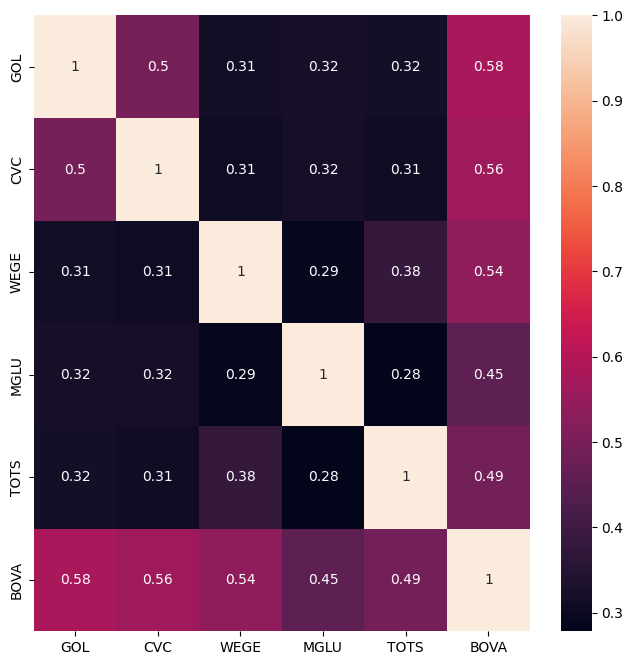

In [13]:
plt.figure(figsize=(8, 8))
sns.heatmap(taxa_retorno.corr(), annot=True)